# Chinook Data Analysis

## 1- Connection To MySQL and Creating Tables

#### Step 1: Importing Necessary Libraries

In [2]:
import pandas as pd

import json
import mysql.connector

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Read Json File Containing Config

In [3]:
with open('/Users/mahlagha/Desktop/Works in Progress/Data Science/Daneshkar/5- Data Analysis/Mentor/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

#### Step 3: Connecting to MySQL Using SQLAlchemy library

In [4]:
from sqlalchemy import create_engine

# Extract the connection details from the config
username = db_config['user']
password = db_config['password']
host = db_config['host']
database = db_config['database']

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

#### Step 4: Creating Dataframes

In [5]:
Album = pd.read_sql('Album', con=engine)
Artist = pd.read_sql('Artist', con=engine)
Customer = pd.read_sql('Customer', con=engine)
Employee = pd.read_sql('Employee', con=engine)
Genre = pd.read_sql('Genre', con=engine)
Invoice = pd.read_sql('Invoice', con=engine)
InvoiceLine = pd.read_sql('InvoiceLine', con=engine)
MediaType = pd.read_sql('MediaType', con=engine)
Playlist = pd.read_sql('Playlist', con=engine)
PlaylistTrack = pd.read_sql('PlaylistTrack', con=engine)
Track = pd.read_sql('Track', con=engine)

#### Step 5: Save csv files

In [6]:
Album.to_csv('/Users/mahlagha/Chinook/data/processed/Album.csv', index=False)
Artist.to_csv('/Users/mahlagha/Chinook/data/processed/Artist.csv', index=False)
Customer.to_csv('/Users/mahlagha/Chinook/data/processed/Customer.csv', index=False)
Employee.to_csv('/Users/mahlagha/Chinook/data/processed/Employee.csv', index=False)
Genre.to_csv('/Users/mahlagha/Chinook/data/processed/Genre.csv', index=False)
Invoice.to_csv('/Users/mahlagha/Chinook/data/processed/Invoice.csv', index=False)
InvoiceLine.to_csv('/Users/mahlagha/Chinook/data/processed/InvoiceLine.csv', index=False)
MediaType.to_csv('/Users/mahlagha/Chinook/data/processed/MediaType.csv', index=False)
Playlist.to_csv('/Users/mahlagha/Chinook/data/processed/Playlist.csv', index=False)
PlaylistTrack.to_csv('/Users/mahlagha/Chinook/data/processed/PlaylistTrack.csv', index=False)
Track.to_csv('/Users/mahlagha/Chinook/data/processed/Track.csv', index=False)

## 2-Descriptive Analysis

In [7]:
tables_dict = {
    'Album': Album,
    'Artist': Artist,
    'Customer': Customer,
    'Employee': Employee,
    'Genre': Genre,
    'Invoice': Invoice,
    'InvoiceLine': InvoiceLine,
    'MediaType': MediaType,
    'Playlist': Playlist,
    'PlaylistTrack': PlaylistTrack,
    'Track': Track
    }

for k, v in tables_dict.items():
    print(f"{k} Dimension: {v.shape[0]} rows,  {v.shape[1]} columns")

Album Dimension: 347 rows,  3 columns
Artist Dimension: 275 rows,  2 columns
Customer Dimension: 59 rows,  13 columns
Employee Dimension: 8 rows,  15 columns
Genre Dimension: 25 rows,  2 columns
Invoice Dimension: 412 rows,  9 columns
InvoiceLine Dimension: 2240 rows,  5 columns
MediaType Dimension: 5 rows,  2 columns
Playlist Dimension: 18 rows,  2 columns
PlaylistTrack Dimension: 8715 rows,  2 columns
Track Dimension: 3503 rows,  9 columns


## 3-Checking Missing Values

In [8]:
for k, v in tables_dict.items():
    print(v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-n

No Missing Value Concluded.

## 4-Checking Duplicates

In [9]:
for k, v in tables_dict.items():
    print('In {} dataframe, Known observations: {} - Unique observations: {}'.format(k, len(v.index),len(v.drop_duplicates().index)))

In Album dataframe, Known observations: 347 - Unique observations: 347
In Artist dataframe, Known observations: 275 - Unique observations: 275
In Customer dataframe, Known observations: 59 - Unique observations: 59
In Employee dataframe, Known observations: 8 - Unique observations: 8
In Genre dataframe, Known observations: 25 - Unique observations: 25
In Invoice dataframe, Known observations: 412 - Unique observations: 412
In InvoiceLine dataframe, Known observations: 2240 - Unique observations: 2240
In MediaType dataframe, Known observations: 5 - Unique observations: 5
In Playlist dataframe, Known observations: 18 - Unique observations: 18
In PlaylistTrack dataframe, Known observations: 8715 - Unique observations: 8715
In Track dataframe, Known observations: 3503 - Unique observations: 3503


No duplicates Concluded.

## 5- Distribution of key Variables

### 5-1 Categorical Variables

A) Genre Type

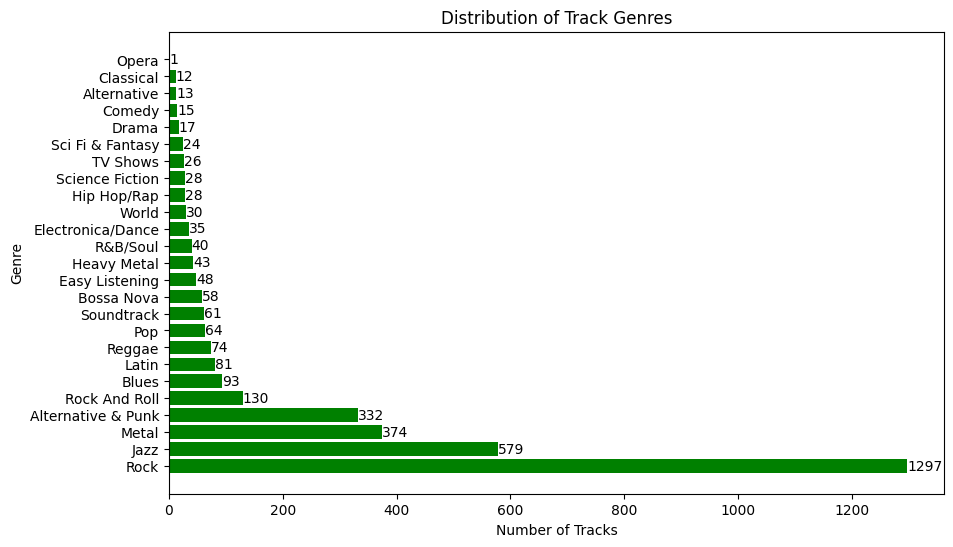

In [10]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
genre_counts_tracks = Track['GenreId'].value_counts()
barhchart = plt.barh(Genre['Name'], genre_counts_tracks, align='center', color='green')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Track Genres')
plt.ylabel('Genre')
plt.xlabel('Number of Tracks')
plt.show()

B) Media Type

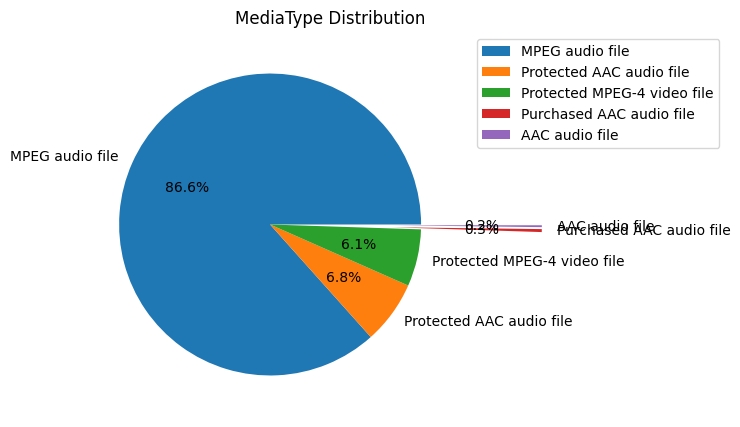

In [11]:
# Pie Plot
plt.figure(figsize=(6,5))
media_counts_tracks = Track['MediaTypeId'].value_counts()
labels = MediaType['Name'].unique()
explode = [0.8 if count < media_counts_tracks.max() * 0.05 else 0 for count in media_counts_tracks]
plt.pie(media_counts_tracks, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('MediaType Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

C) Customers' Nationality

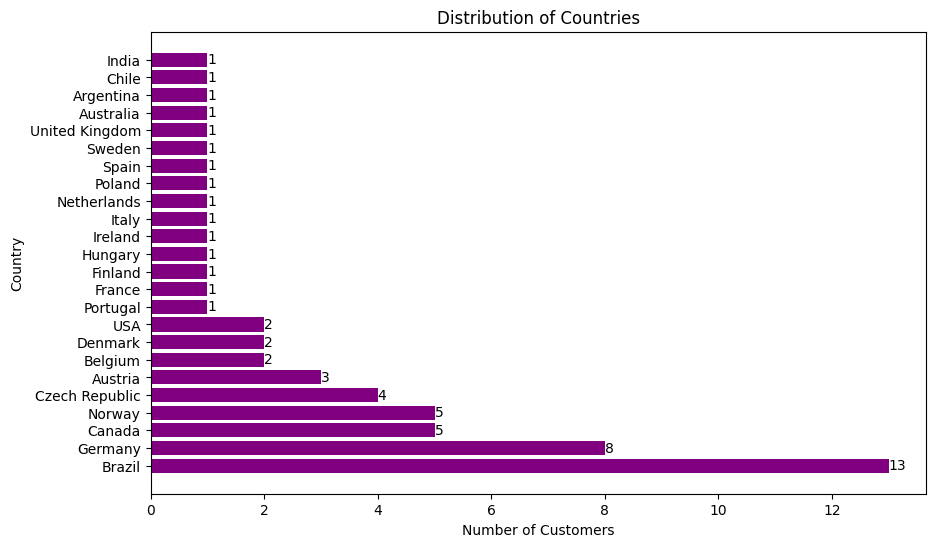

In [12]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
customer_country_count = Customer['Country'].value_counts()
barhchart = plt.barh(Customer['Country'].unique(), customer_country_count, align='center', color='purple')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Countries')
plt.ylabel('Country')
plt.xlabel('Number of Customers')
plt.show()

D) Employees' Job Title

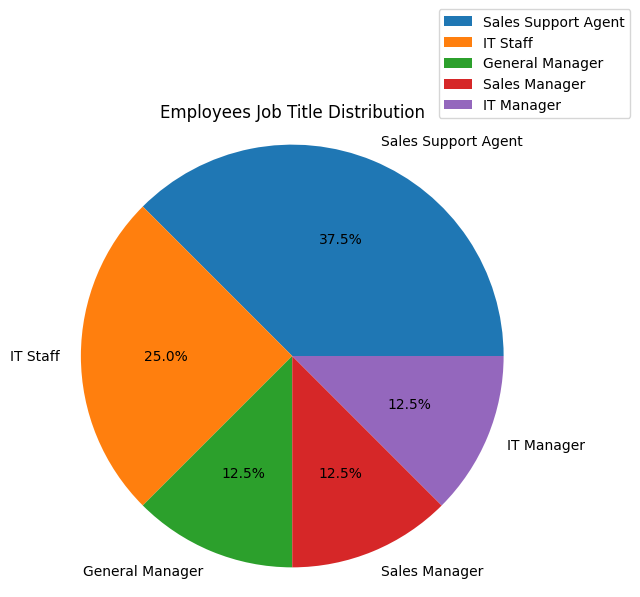

In [13]:
# Pie Plot
plt.figure(figsize=(6,6))
labels = Employee['Title'].value_counts().index
plt.pie (Employee['Title'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Employees Job Title Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

### 5-2 Check Normality of Numerical Variables 

#### 5-2-1 Track Duration 


A) Histogram and Q-Q Plot

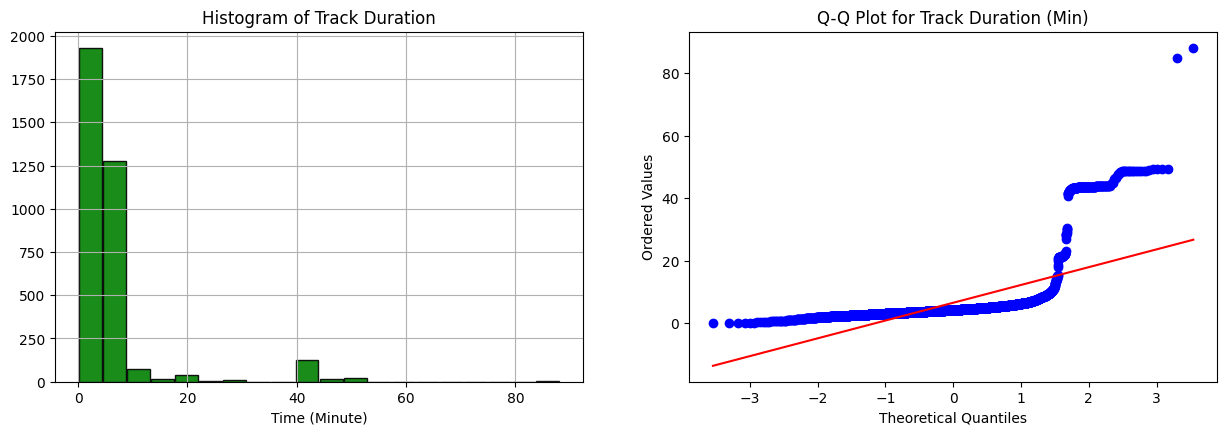

In [14]:
plt.figure(figsize=(15 , 10))

# Histogram
track_time = Track['Milliseconds']/60000
plt.subplot(2,2,1)
plt.hist(track_time, bins=20, alpha=0.9, rwidth=0.95, color='g',edgecolor='k')
plt.title('Histogram of Track Duration')
plt.xlabel('Time (Minute)')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Track['Milliseconds']/60000, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Duration (Min)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [87]:
# Shapiro-Wilk Test
# H0 = Average Sale is normally distributed
# H1 = Average Sale is NOT normally distributed

statistic, p_value = stats.shapiro(Track['Milliseconds']/60000)
print(f"Shapiro-Wilk Test for Track Duration: Statistic = {statistic}, p-value = {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Track Duration data is not normally distributed [Reject H0]." )
else:
    print("Therefore, Track Duration is normally distributed [Fail to Reject H0].")

Shapiro-Wilk Test for Track Duration: Statistic = 0.4069350980582944, p-value = 2.7287436202316018e-75
Track Duration data is not normally distributed [Reject H0].


**** Considering the Histogram, Q-Q plot and the result of Shapiro-wilk test, Track Duration is not normally distributed ***

C) Box Plot - Cheking for Outliers

Min= 0.0178 min, Max= 88.1159 min, Q1= 3.4547 min, median= 4.2606 min, Q3= 5.3607 min
IQR= 1.9061, lower_bound= 0.5956, upper_bound= 8.2198


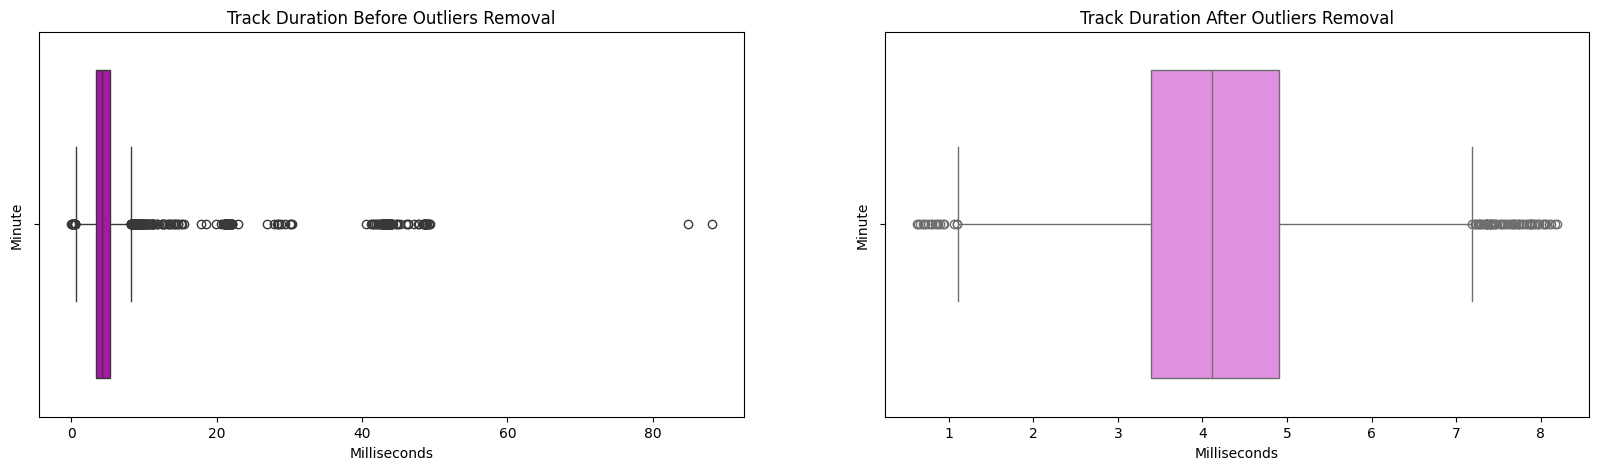

In [16]:
# Box plot Calculations
MIN = np.min(Track['Milliseconds']/60000)
Q1 = np.quantile (Track['Milliseconds']/60000, 0.25)
Q2 = np.quantile (Track['Milliseconds']/60000, 0.5)
Q3 = np.quantile (Track['Milliseconds']/60000, 0.75)
MAX = np.max(Track['Milliseconds']/60000)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Min= {MIN.round(4)} min, Max= {MAX.round(4)} min, Q1= {Q1.round(4)} min, median= {Q2.round(4)} min, Q3= {Q3.round(4)} min')
print(f'IQR= {IQR.round(4)}, lower_bound= {lower_bound.round(4)}, upper_bound= {upper_bound.round(4)}')

# Remove outliers
Track_time_cleaned = Track[(Track['Milliseconds']/60000 >= lower_bound) & (Track['Milliseconds']/60000 <= upper_bound)]


# Box Plots
track_time = Track['Milliseconds']/60000
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x=track_time, color='m')
plt.title('Track Duration Before Outliers Removal')
plt.ylabel('Minute')

track_time_clean = Track_time_cleaned['Milliseconds']/60000
plt.subplot(1, 2, 2)
sns.boxplot(x=track_time_clean, color='violet')
plt.title('Track Duration After Outliers Removal')
plt.ylabel('Minute')
plt.show()

#### Conclusion About Track Duration
Long tracks are related to podcasts from the genres of Sci Fi and Fantacy, Science Ficction, Drama, Comedy, and TV show programs. Naturally, the duration of these programs is much longer than a normal Pop or Rock song. These programs cannot be considered as outliers.

#### 5-2-2 Track Size 


A) Histogram and Q-Q Plot

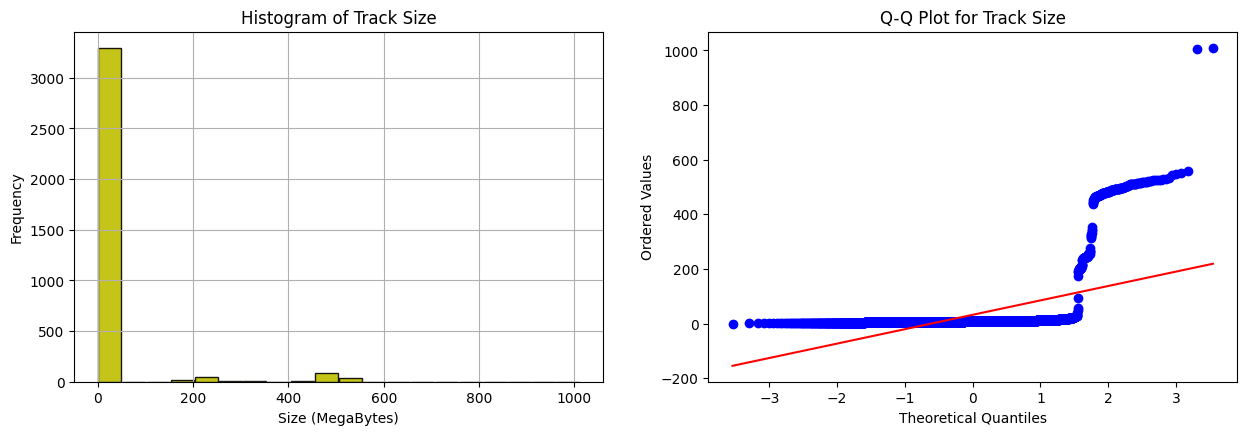

In [17]:
plt.figure(figsize=(15, 10))

# Histogram
track_size = Track['Bytes']/1048576
plt.subplot(2,2,1)
plt.hist(track_size, bins=20, alpha=0.9, rwidth=0.95, color='y', edgecolor='k')
plt.title('Histogram of Track Size')
plt.xlabel('Size (MegaBytes)')
plt.ylabel('Frequency')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Track['Bytes']/1048576, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Size')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [88]:
# Shapiro-Wilk Test
# H0 = Average Sale is normally distributed
# H1 = Average Sale is NOT normally distributed

statistic, p_value = stats.shapiro(Track['Bytes']/1048576)
print(f"Shapiro-Wilk Test for Track Size: Statistic = {statistic}, p-value = {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Track Size data is not normally distributed [Reject H0]." )
else:
    print( "Therefore, Track Size is normally distributed [Fail to Reject H0].")

Shapiro-Wilk Test for Track Size: Statistic = 0.2756405817618163, p-value = 1.727556506066784e-79
Track Size data is not normally distributed [Reject H0].


**** Considering the Histogram, Q-Q plot and the result of Shapiro-wilk test, Track Size is not normally distributed ***

D) Box Plot - Handling Outliers

Min= 0.037 min, Max= 1010.4619 min, Q1= 6.0487 min, median= 7.7323 min, Q3= 9.7912 min
IQR= 3.7424, lower_bound= 0.4351, upper_bound= 15.4048


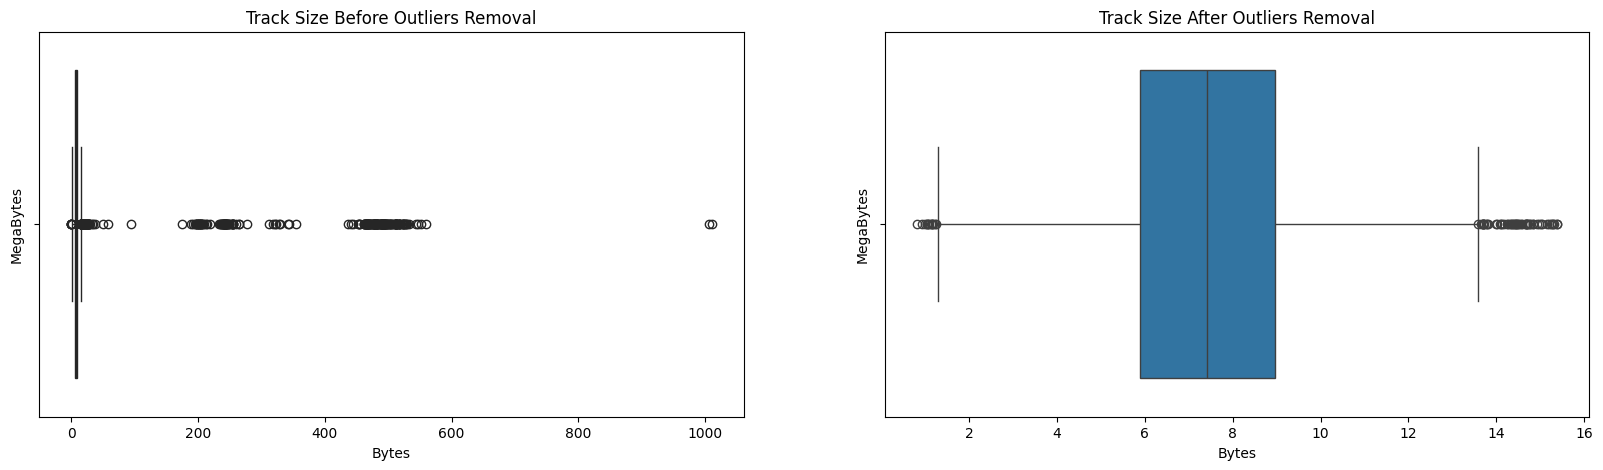

In [89]:
# Box plot Calculations
MIN = np.min(Track ['Bytes']/1048576)
Q1 = np.quantile (Track ['Bytes']/1048576, 0.25)
Q2 = np.quantile (Track ['Bytes']/1048576, 0.5)
Q3 = np.quantile (Track ['Bytes']/1048576, 0.75)
MAX = np.max(Track ['Bytes']/1048576)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Min= {MIN.round(4)} min, Max= {MAX.round(4)} min, Q1= {Q1.round(4)} min, median= {Q2.round(4)} min, Q3= {Q3.round(4)} min')
print(f'IQR= {IQR.round(4)}, lower_bound= {lower_bound.round(4)}, upper_bound= {upper_bound.round(4)}')

# Remove outliers
Track_Size_cleaned = Track[(Track ['Bytes']/1048576 >= lower_bound) & (Track ['Bytes']/1048576 <= upper_bound)]


# Box Plots
track_size = Track ['Bytes']/1048576
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=track_size, color='green')
plt.title('Track Size Before Outliers Removal')
plt.ylabel('MegaBytes')

track_size_clean = Track_Size_cleaned['Bytes']/1048576
plt.subplot(1, 2, 2)
sns.boxplot(x=track_size_clean)
plt.title('Track Size After Outliers Removal')
plt.ylabel('MegaBytes')
plt.show()

#### Conclusion About Track Size
Long tracks are related to podcasts from the genres of Sci Fi and Fantacy, Science Ficction, Drama, Comedy, and TV show programs. Naturally, the duration and the occupied space of these programs is much longer and normal songs. These programs cannot be considered as outliers.

#### 5-2-3 Unit Price

In [20]:
Track['UnitPrice'].unique()

array([0.99, 1.99])

According to the Above Unique function executed on Track Dataframe, UnitPrice is not a continuous numerical variable because there is only two different price available {0.99, 1.99}. Therefore, it cannot be normally distributed.

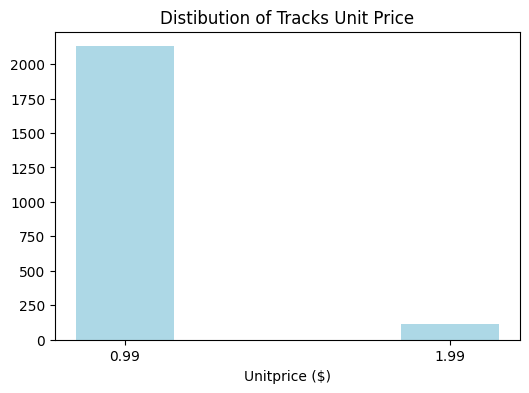

In [21]:
# Bar plot
plt.figure(figsize= (6,4))
plt.bar(InvoiceLine['UnitPrice'].unique(), InvoiceLine['UnitPrice'].value_counts(), color = 'lightblue', width = 0.3, tick_label = ['0.99', '1.99'])
plt.title('Distibution of Tracks Unit Price')
plt.xlabel('Unitprice ($)')
plt.show()

#### 5-2-4 Quantity Sold

In [22]:
InvoiceLine['Quantity'].unique()

array([1])

According to the Above Unique function executed on InvoiceLine Dataframe, Quantity is not a continuous numerical variable because The number of each track sold is only 1. Therefore, it cannot be normally distributed.

#### 5-2-5 Total Sale

A) Histogram and Q-Q Plot

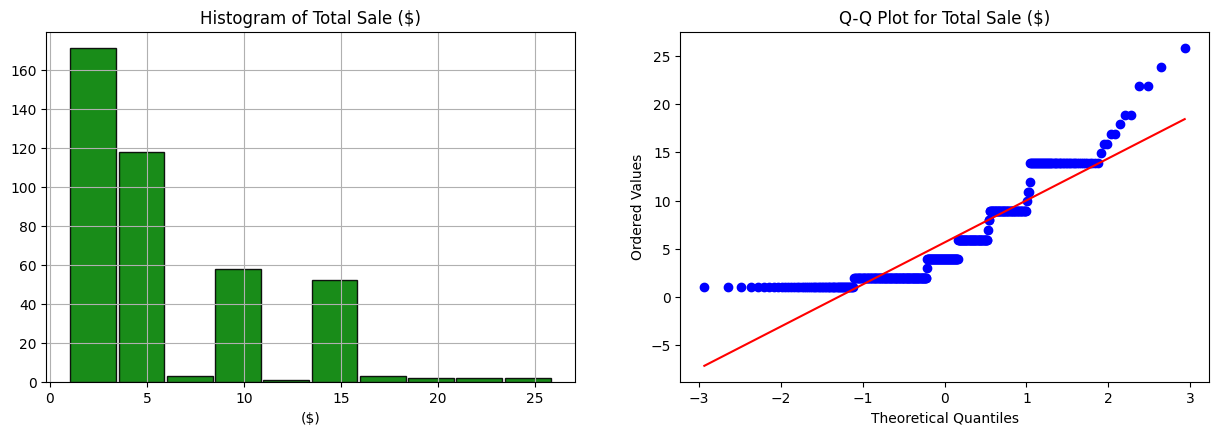

In [93]:
plt.figure(figsize=(15 , 10))

# Histogram
plt.subplot(2,2,1)
plt.hist(Invoice.Total, alpha=0.9, rwidth=0.95, color='g',edgecolor='k')
plt.title('Histogram of Total Sale ($)')
plt.xlabel('($)')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Invoice.Total, dist="norm", plot=plt)
plt.title('Q-Q Plot for Total Sale ($)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [97]:
# Shapiro-Wilk Test
# H0 = Total Sale is normally distributed
# H1 = Total Sale is NOT normally distributed

statistic, p_value = stats.shapiro(Invoice['Total'])
print(f"Shapiro-Wilk Test for Total Sale: Statistic = {statistic}, p-value = {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Total Sales is not normally distributed [Reject H0]." )
else:
    print( "Total Sale is normally distributed [Fail to Reject H0].")

Shapiro-Wilk Test for Total Sale: Statistic = 0.8367111017894933, p-value = 3.40018438974463e-20
Total Sales is not normally distributed [Reject H0].


C) D’Agostino’s K^2 Test

In [100]:
# D’Agostino’s K^2 Test
# H0: Average Sale is normally distributed
# H1: Average Sale is NOT normally distributed

statistic, p_value = stats.normaltest(Invoice['Total'])
print(f'D-Agostino K^2 Test for Total Sale: Statistics = {statistic.round(3)}, p-value = {p_value.round(3)}')

# interpret
alpha = 0.05
if p_value > alpha:
    print('Total Sales is normally distributed [Fail to Reject H0].')
else:
    print('Total Sale is NOT normally distributed [Reject H0].')

D-Agostino K^2 Test for Total Sale: Statistics = 77.621, p-value = 0.0
Total Sale is NOT normally distributed [Reject H0].


According to Shapiro-wilk test and D'Agostino's k^2 Test, Total sale is not normally distributted.

## 6- Statistical Hypothesis Testing

### 6-1 Top 3 popular genres. Check the difference in the average price of these three genres.

In [372]:
# Find Top 3 Genres
genre_track_price = pd.merge(Genre, Track[['TrackId', 'GenreId', 'UnitPrice']], on= 'GenreId')
genre_track_price.rename(columns = {'Name':'GenreName'}, inplace = True)

genre_track_invoiceline = pd.merge(genre_track_price, InvoiceLine[['TrackId', 'Quantity']], on='TrackId')

best_sale_genre = (genre_track_invoiceline.groupby('GenreName')
                   .agg({'UnitPrice': 'sum'})
                   .reset_index()
                   .sort_values(by='UnitPrice', ascending=False)
                   .head(3))
best_sale_genre

,GenreId,GenreName,TrackId,UnitPrice,Quantity
0,1,Rock,1,0.99,1
1,1,Rock,2,0.99,1
2,1,Rock,2,0.99,1
3,1,Rock,3,0.99,1
4,1,Rock,4,0.99,1
...,...,...,...,...,...
2235,24,Classical,3494,0.99,1
2236,24,Classical,3496,0.99,1
2237,24,Classical,3499,0.99,1
2238,24,Classical,3500,0.99,1


In [371]:
# Hypothesis testing: One_Way ANOVA

rock = genre_track_invoiceline[genre_track_invoiceline['GenreName'] == 'Rock']['UnitPrice']
latin = genre_track_invoiceline[genre_track_invoiceline['GenreName'] == 'Latin']['UnitPrice']
metal = genre_track_invoiceline[genre_track_invoiceline['GenreName'] == 'Metal']['UnitPrice']

# Function to check for constant values
def check_constant(data):
    return len(data.unique()) == 1

# Check constants 
if check_constant(rock):
    print(f"Rock price data is constant with value: {rock.iloc[0]}")
if check_constant(latin):
    print(f"Latin price data is constant with value: {latin.iloc[0]}")
if check_constant(metal):
    print(f"Metal price data is constant with value: {metal.iloc[0]}")

# Perform ANOVA only if none of the data arrays are constant
if not (check_constant(rock) or check_constant(latin) or check_constant(metal)):
    f_stat, p_value = stats.f_oneway(rock, latin, metal)
    print(f'One_Way ANOVA test for average price in Top 3 genres: Statistics = {f_stat.round(3)}, p-value = {p_value.round(3)}')

    alpha = 0.05
    if p_value < alpha:
        print(f'Average price of top 3 genres (Rock- latin- metal) are similar:  the p_value ({p_value}) < 0.05')
    else:
        print(f'Average price of top 3 genres (Rock- latin- metal) are different: as the p_value ({p_value}) > 0.05')
else:
    print("Cannot perform ANOVA because one or more genres have constant price.")

    rock

Rock price data is constant with value: 0.99
Latin price data is constant with value: 0.99
Metal price data is constant with value: 0.99
Cannot perform ANOVA because one or more genres have constant price.


Conclusion: The Average price in top 3 genres are the same, because they have identical values.

### 6-2 Correlation between Track duration and Price

In [123]:
# Numerical variable vs Numerical variable
# Spearman correlation

# H0: There is NOT a monotonic relationship between Track Duration and price.
# H1: There is a monotonic relationship between Track Duration and price.
alpha = 0.05
correlation, p_value = stats.spearmanr(Track['Milliseconds'], Track['UnitPrice'])
print(f'Spearman correlation between Track Duration and Price: correlation = {correlation.round(3)}, p-value = {p_value.round(3)}')

if p_value > alpha:
    print('There is NOT a monotonic relationship between Track Duration and price (Fail to Reject H0).')
else:
    print('There is a monotonic relationship between Track Duration and price (Reject H0)')

Spearman correlation between Track Duration and Price: correlation = 0.41, p-value = 0.0
There is a monotonic relationship between Track Duration and price (Reject H0)


### 6-3 Correlation between Genre and Media type

In [127]:
# Categorical variable vs Categorical variable
# Chi-Square Test

# H0: There is NOT an association between the Genre and Media Type.
# H1: There is an association between the Genre and Media Type.

# Step1: Merge dataframes
genre_track = pd.merge(Genre, Track[['TrackId', 'GenreId']], on= 'GenreId')
genre_track.rename(columns = {'Name':'GenreName'}, inplace = True)

media_track = pd.merge(MediaType, Track[['TrackId', 'MediaTypeId']], on= 'MediaTypeId')
media_track.rename(columns = {'Name':'MediaName'}, inplace = True)

genre_media_merge = pd.merge (genre_track, media_track, on='TrackId')

# Step2: Create crosstab dataframe
crosstab = pd.crosstab(genre_media_merge['GenreName'], genre_media_merge['MediaName'])

# Step3: performe Chi-square test
stat, p_value, dof, expected = stats.chi2_contingency(crosstab,correction=True)
print(f'Chi-Square Test between Genre and Media Type: p-value : {p_value}, degree of freedom: {dof}')

alpha = 0.05
if p_value < alpha:
    print('Genre and MediaType are Dependent (Reject H0)')
else:
    print('Genre and MediaType are Independent (Fail to Reject H0)')

Chi-Square Test between Genre and Media Type: p-value : 0.0, degree of freedom: 96
Genre and MediaType are Dependent (Reject H0)


### 6-4 Correlation Between Total Sale and Date

In [212]:
# Numerical variable vs Numerical variable
# Spearman correlation

# H0: There is NOT a monotonic relationship between InvoiceDate and TotalSale.
# H1: There is a monotonic relationship between InvoiceDate and TotalSale.

Invoice['InvoiceDateOrdinal'] = Invoice['InvoiceDate'].apply(lambda x: x.toordinal())

alpha = 0.05
correlation, p_value = stats.spearmanr(Invoice['InvoiceDateOrdinal'], Invoice['Total'])
print(f'Spearman correlation between InvoiceDate and TotalSale: correlation = {correlation.round(3)}, p-value = {p_value.round(3)}')

if p_value > alpha:
    print('There is NOT a monotonic relationship between InvoiceDate and TotalSale (Fail to Reject H0).')
else:
    print('There is a monotonic relationship between InvoiceDate and TotalSale (Reject H0)')

Spearman correlation between InvoiceDate and TotalSale: correlation = 0.007, p-value = 0.881
There is NOT a monotonic relationship between InvoiceDate and TotalSale (Fail to Reject H0).


#### Genre Sales Trend 

In [254]:
# Merge Genre and invoice date
genre_date_merge = (pd.merge(Genre, Track[['TrackId', 'GenreId']], on= 'GenreId')
                    .merge(InvoiceLine[['TrackId', 'InvoiceLineId', 'InvoiceId']], on='TrackId')
                    .merge(Invoice[['InvoiceId', 'InvoiceDate', 'Total']], on='InvoiceId'))

genre_date_merge['Year'] = genre_date_merge['InvoiceDate'].dt.year

genre_annual_sale = genre_date_merge.groupby(['Name','Year'])['Total'].sum().unstack().fillna(0)
genre_annual_sale.head()

Year,2021,2022,2023,2024,2025
Name,,,,,
Alternative,0.00,80.29,63.44,67.44,0.00
Alternative & Punk,466.29,264.38,437.76,345.63,447.60
Blues,112.86,44.55,105.93,73.26,93.06
Bossa Nova,13.86,27.72,20.79,0.00,23.76
Classical,0.00,99.08,111.97,105.99,0.00


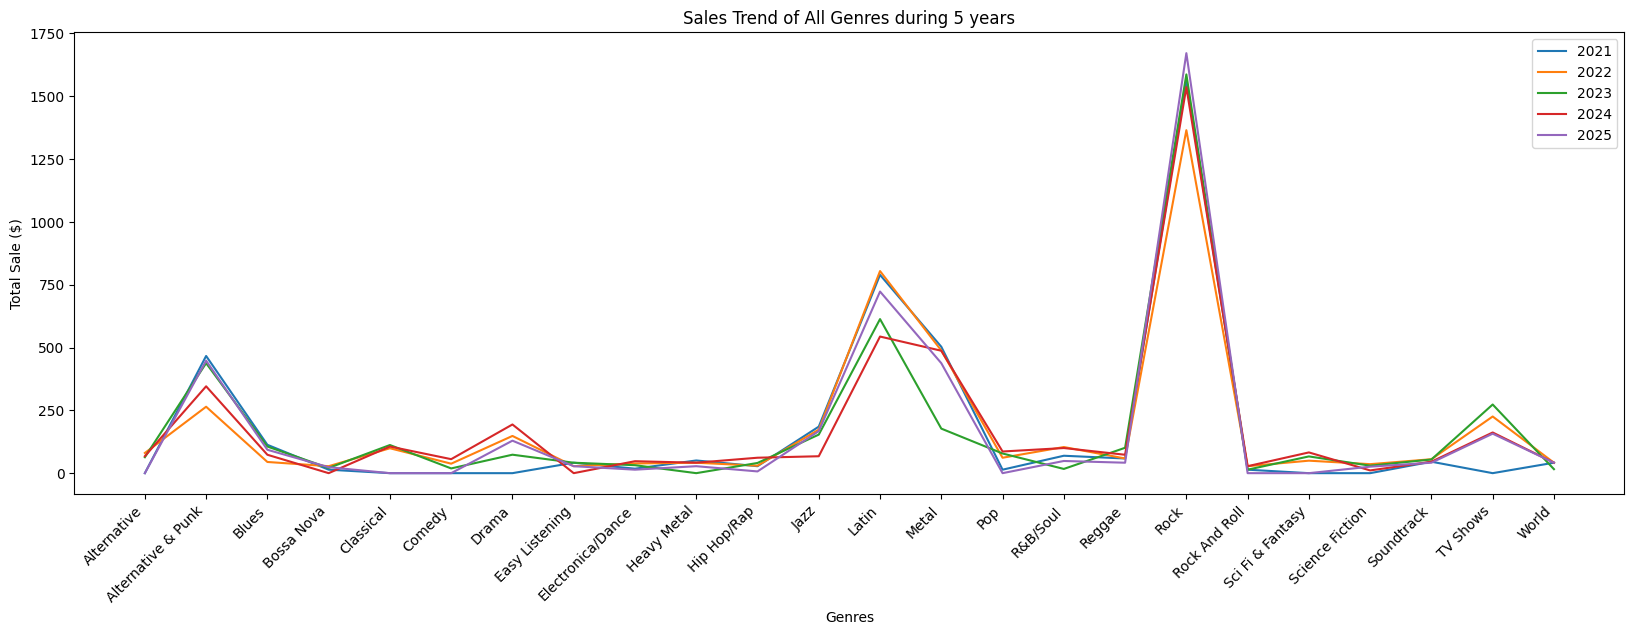

In [255]:
# Plot
plt.figure(figsize=(20,6))
labels = genre_annual_sale.index
plt.plot(genre_annual_sale)
plt.legend(genre_annual_sale.columns)
plt.title("Sales Trend of All Genres during 5 years")
plt.xlabel('Genres')
plt.ylabel('Total Sale ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Media type Sales Trend

In [256]:
media_date_merge = (pd.merge(MediaType, Track[['TrackId', 'MediaTypeId']], on= 'MediaTypeId')
                    .merge(InvoiceLine[['TrackId', 'InvoiceLineId', 'InvoiceId']], on='TrackId')
                    .merge(Invoice[['InvoiceId', 'InvoiceDate', 'Total']], on='InvoiceId'))

media_date_merge['Year'] = media_date_merge['InvoiceDate'].dt.year

media_annual_sale = media_date_merge.groupby(['Name','Year'])['Total'].sum().unstack().fillna(0)
media_annual_sale.head()

Year,2021,2022,2023,2024,2025
Name,,,,,
AAC audio file,0.00,15.86,15.86,16.86,0.00
MPEG audio file,3939.21,3453.17,3284.98,3420.45,3740.46
Protected AAC audio file,72.27,353.67,347.75,314.15,72.27
Protected MPEG-4 video file,0.00,496.85,461.95,504.79,312.31
Purchased AAC audio file,0.00,9.90,15.86,0.00,0.00


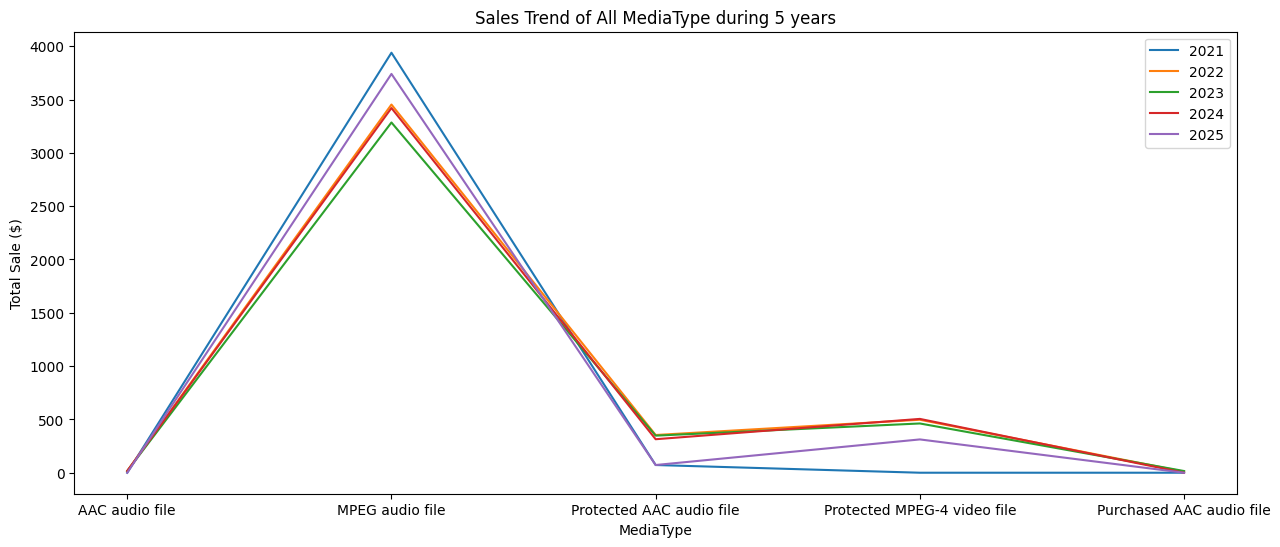

In [261]:
# Plot
plt.figure(figsize=(15,6))
labels = media_annual_sale.index
plt.plot(media_annual_sale)
plt.legend(media_annual_sale.columns)
plt.title("Sales Trend of All MediaType during 5 years")
plt.xlabel('MediaType')
plt.ylabel('Total Sale ($)')
plt.show()

### 6-5 Correlation between Media type and Track Size

In [281]:
# Categorical variable vs Numerical variable
# Kendall rank correlation = Outliers and not normally distributed

# H0: There is NOT a correlation between MediaType and Track Size.
# H1: There is a correlation between MediaType and Track Size.

media_size_merge = pd.merge(MediaType, Track[['TrackId', 'MediaTypeId', 'Bytes']], on= 'MediaTypeId')
media_size_merge['MegaBytes']= media_size_merge['Bytes']/1048576
media_size_avg = media_size_merge.groupby('Name')['MegaBytes'].mean().reset_index()

coef, p_value = stats.kendalltau(media_size_merge['Name'], media_size_merge['MegaBytes'])
print(f'Kendall rank correlation between MediaType and Track Size: correlation = {coef.round(3)}, p-value = {p_value.round(3)}')

alpha = 0.05
if p_value > alpha:
    print('There is NOT a correlation between MediaType and Track Size (Fail to Reject H0).')
else:
    print('There is a correlation between MediaType and Track Size (Reject H0).')
media_size_avg

Kendall rank correlation between MediaType and Track Size: correlation = 0.062, p-value = 0.0
There is a correlation between MediaType and Track Size (Reject H0).


,Name,MegaBytes
0,AAC audio file,4.269403
1,MPEG audio file,8.230618
2,Protected AAC audio file,4.447742
3,Protected MPEG-4 video file,401.014054
4,Purchased AAC audio file,8.353589


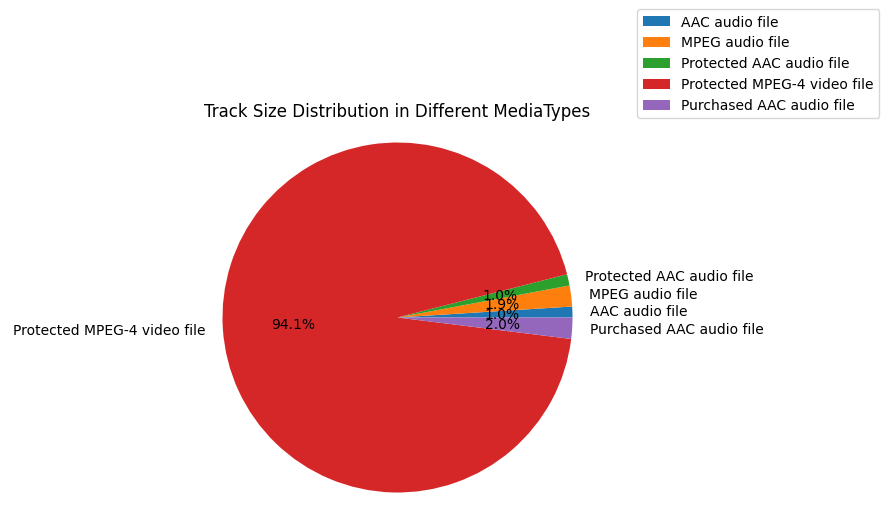

In [288]:
# Plot
plt.figure(figsize=(10,5))
labels = media_size_avg['Name'].unique()
#explode = [0.8 if count < media_counts_tracks.max() * 0.05 else 0 for count in media_counts_tracks]
plt.pie(media_size_avg['MegaBytes'], labels=labels, autopct='%1.1f%%')
plt.title('Track Size Distribution in Different MediaTypes')
plt.axis('equal')
plt.legend(loc='lower left', bbox_to_anchor=(0.8,1))
plt.show()

Which genres have more Protected MPEG-4 video files?

In [331]:
media_track_merge = pd.merge(MediaType, Track[['TrackId', 'MediaTypeId', 'GenreId']], on= 'MediaTypeId')
media_track_merge.rename(columns = {'Name':'MediaName'}, inplace = True)

media_track_genre = pd.merge(media_track_merge, Genre, on='GenreId')
media_track_genre.rename(columns = {'Name':'GenreName'}, inplace = True)

MPEG_4_genre = media_track_genre.groupby(['MediaName', 'GenreName']).count().reset_index()
MPEG_4_genre[MPEG_4_genre['MediaName'] == "Protected MPEG-4 video file"]

,MediaName,GenreName,MediaTypeId,TrackId,GenreId
30,Protected MPEG-4 video file,Alternative,1,1,1
31,Protected MPEG-4 video file,Comedy,17,17,17
32,Protected MPEG-4 video file,Drama,64,64,64
33,Protected MPEG-4 video file,Sci Fi & Fantasy,26,26,26
34,Protected MPEG-4 video file,Science Fiction,13,13,13
35,Protected MPEG-4 video file,TV Shows,93,93,93


### 6-6 Difference in Sales Between Employees:



In [377]:
# Hypothesis testing: One_way Anova

Employee['FullName'] = Employee['FirstName'] + " " + Employee ['LastName']
employee_customer_sale =(pd.merge(Employee[['EmployeeId', 'FullName']], Customer[['CustomerId', 'SupportRepId']], left_on='EmployeeId', right_on='SupportRepId')
                       .merge(Invoice[['InvoiceId', 'CustomerId', 'Total']], on='CustomerId'))

Jane_Peacock = employee_customer_sale[employee_customer_sale['FullName'] == 'Jane Peacock']['Total']
Margaret_Park = employee_customer_sale[employee_customer_sale['FullName'] == 'Margaret Park']['Total']
Steve_Johnson = employee_customer_sale[employee_customer_sale['FullName'] == 'Steve Johnson']['Total']


f_stat, p_value = stats.f_oneway(Jane_Peacock, Margaret_Park, Steve_Johnson)
print(f'One_Way ANOVA test for Employee performance: Statistics = {f_stat.round(3)}, p-value = {p_value.round(3)}')

alpha = 0.05
if p_value < alpha:
    print(f'The Performancee of Employees in Sale are similar')
else:
    print(f'The Performancee of Employees in Sale are different')

One_Way ANOVA test for Employee performance: Statistics = 0.06, p-value = 0.941
The Performancee of Employees in Sale are different


### 6-7 Check the correlation between Track duration and Track size

In [32]:
x = Track['Milliseconds']/60000
y = Track['Bytes']/1048576
correlation = x.corr(y)

print('correlation = ', correlation.round(2))
if abs(correlation) > 0.5:
    print("There is a strong relationship between Track Duration (minutes) and Track Size (MegaBytes).")
elif abs(correlation) > 0.3:
    print("There is a moderate relationship between Track Duration (minutes) and Track Size (MegaBytes).")
else:
    print("There is a weak relationship between Track Duration (minutes) and Track Size (MegaBytes).")

correlation =  0.96
There is a strong relationship between Track Duration (minutes) and Track Size (MegaBytes).


## 7- Confidence Interval 

### 7-1 Is the average length of Tracks in different genres the same? Calculate the 95% confidence interval for the mean length of Tracks in each Genre.

In [33]:
# Step 1
# Merge the required dataframe
genre_track_length = pd.merge(Genre, Track[['TrackId', 'GenreId', 'Milliseconds']], on= 'GenreId')
genre_track_length.rename(columns = {'Name':'GenreName'}, inplace = True)
genre_track_length['Minutes'] = (genre_track_length['Milliseconds']/60000).round(2)

avg_genre_length = (genre_track_length.groupby('GenreName')['Minutes']
                    .agg(['mean', 'count', 'std'])
                    .round(2)
                    .reset_index()
                    .sort_values(by='mean', ascending=False))
avg_genre_length.head()

,GenreName,mean,count,std
20,Sci Fi & Fantasy,48.53,26,1.05
21,Science Fiction,43.76,13,0.52
6,Drama,42.92,64,8.63
23,TV Shows,35.75,93,11.87
5,Comedy,26.42,17,6.96


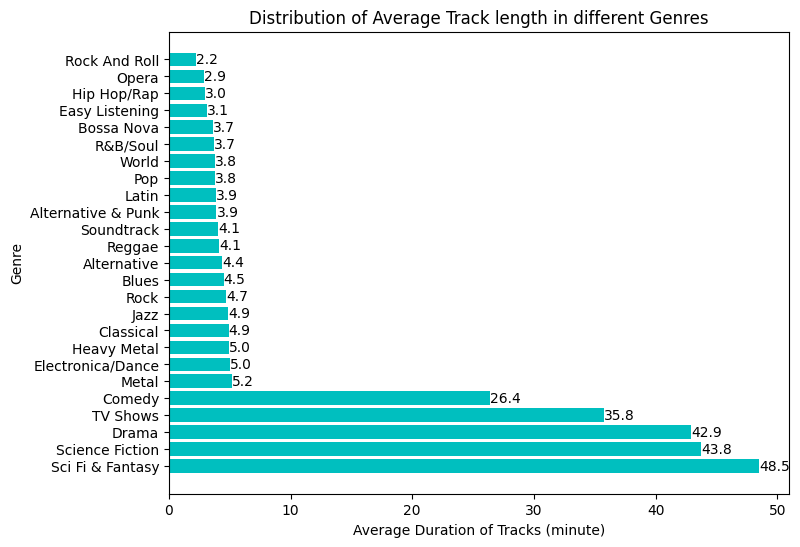

In [60]:
# Step 2
# plot 
plt.figure(figsize=(8,6))
barchart = plt.barh(avg_genre_length['GenreName'], avg_genre_length['mean'], align='center', color='c')

for bar in barchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}', 
             va='center', ha='left', fontsize=10)
    
plt.title('Distribution of Average Track length in different Genres')
plt.ylabel('Genre')
plt.xlabel('Average Duration of Tracks (minute)')
plt.show()

To check the similarity of average track length between different genres, we have to perform a hypothesis testing. The appropriate test for this distribution is Kruskal-Wallis test, because the distribution of average length of different genres is not normal. Therefore, Kruskal-Wallis test is the alternative for one-way Anova for more than 2 levels.

In [209]:
# Step 3
# Kruskal-Wallis test:
genre_data = list(avg_genre_length['mean'])
stat, p_value = stats.kruskal(*genre_data)
print(f'Kruskal-Wallis Test: Statistics= {stat}, p-value= {p_value}')

# interpret
alpha = 0.05
if p_value < alpha:
    print(f'The average length of Tracks in different Genres are the same (Fail to Reject H0).')
else:
    print(f'The average length of Tracks in different Genres are significantly different (Reject H0).')

Kruskal-Wallis Test: Statistics= 24.000000000000014, p-value= 0.46159733306361717
The average length of Tracks in different Genres are significantly different (Reject H0).


In [133]:
# Step 4
# Confidence Interval
confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  
print(f'z= {z.round(2)}')

# Calculate confidence interval
avg_genre_length['lower_bound'] = avg_genre_length['mean'] - z * (avg_genre_length['std'] / np.sqrt(avg_genre_length['count']))
avg_genre_length['upper_bound'] = avg_genre_length['mean'] + z * (avg_genre_length['std'] / np.sqrt(avg_genre_length['count']))
avg_genre_length.head()

z= 1.96


,GenreName,mean,count,std,lower_bound,upper_bound
20,Sci Fi & Fantasy,48.53,26,1.05,48.126400,48.933600
21,Science Fiction,43.76,13,0.52,43.477330,44.042670
6,Drama,42.92,64,8.63,40.805689,45.034311
23,TV Shows,35.75,93,11.87,33.337555,38.162445
5,Comedy,26.42,17,6.96,23.111487,29.728513


### 7-2 What is the average sales in different countries? Calculate the 95% confidence interval for the mean sales in each country

In [134]:
# Merge to Rank countries based on Total Purchase
customer_country_merge = pd.merge(Customer[['CustomerId', 'Country']], Invoice[['CustomerId', 'InvoiceId', 'Total']], on='CustomerId')

customer_country_purchase = (customer_country_merge.groupby('Country')['Total']
                             .agg(['mean', 'count', 'std'])
                             .reset_index()
                             .sort_values(by='mean', ascending=False))
customer_country_purchase.head()

,Country,mean,count,std
6,Chile,6.660000,7,6.610151
12,Hungary,6.517143,7,7.299792
14,Ireland,6.517143,7,7.299792
7,Czech Republic,6.445714,14,7.069362
2,Austria,6.088571,7,6.263371


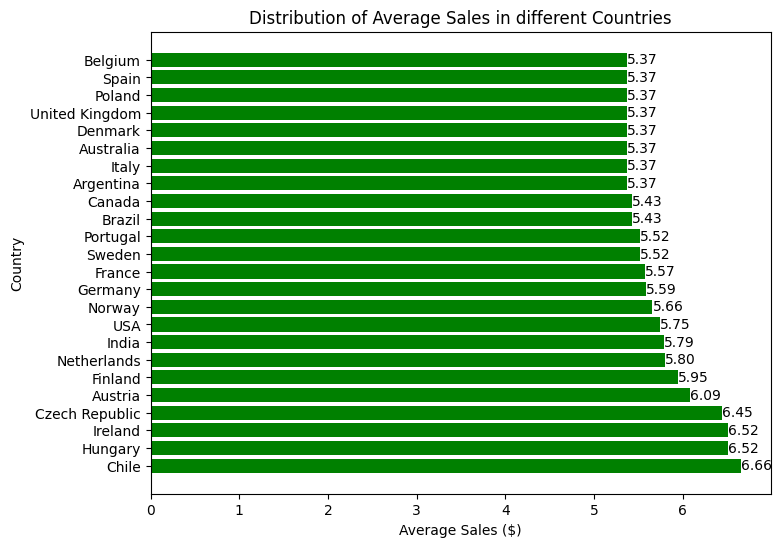

In [138]:
# plot 
plt.figure(figsize=(8,6))
barhchart = plt.barh(customer_country_purchase['Country'], customer_country_purchase['mean'], align='center', color='green')

for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)
    
plt.title('Distribution of Average Sales in different Countries')
plt.ylabel('Country')
plt.xlabel('Average Sales ($)')
plt.show()

In [70]:
# Confidence Interval
confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  
print(f'z= {z.round(2)}')

# Calculate confidence interval
customer_country_purchase['lower_bound'] = customer_country_purchase['mean'] - z * (customer_country_purchase['std'] / np.sqrt(customer_country_purchase['count']))
customer_country_purchase['upper_bound'] = customer_country_purchase['mean'] + z * (customer_country_purchase['std'] / np.sqrt(customer_country_purchase['count']))
customer_country_purchase.head()

z= 1.96


,Country,mean,count,std,lower_bound,upper_bound
6,Chile,6.660000,7,6.610151,1.763221,11.556779
12,Hungary,6.517143,7,7.299792,1.109481,11.924805
14,Ireland,6.517143,7,7.299792,1.109481,11.924805
7,Czech Republic,6.445714,14,7.069362,2.742624,10.148804
2,Austria,6.088571,7,6.263371,1.448687,10.728456


### 7-3 What is the average number of tracks purchased by each user? Calculate the 95% confidence interval for the mean number of tracks purchased by each customer

In [177]:
customer_name_merge = pd.merge(Customer[['CustomerId', 'FirstName', 'LastName']], Invoice[['CustomerId', 'InvoiceId']], on='CustomerId')
customer_name_track = pd.merge(customer_name_merge, InvoiceLine[['InvoiceLineId', 'InvoiceId','TrackId']], on='InvoiceId')
customer_track_purchase = (customer_name_track.groupby(['CustomerId', 'LastName'])['TrackId']
                             .agg(['count'])
                             .reset_index()
                             .sort_values(by='count', ascending=False))
customer_track_purchase.head()

,CustomerId,LastName,count
0,1,Gonçalves,38
44,45,Kovács,38
32,33,Sullivan,38
33,34,Fernandes,38
34,35,Sampaio,38


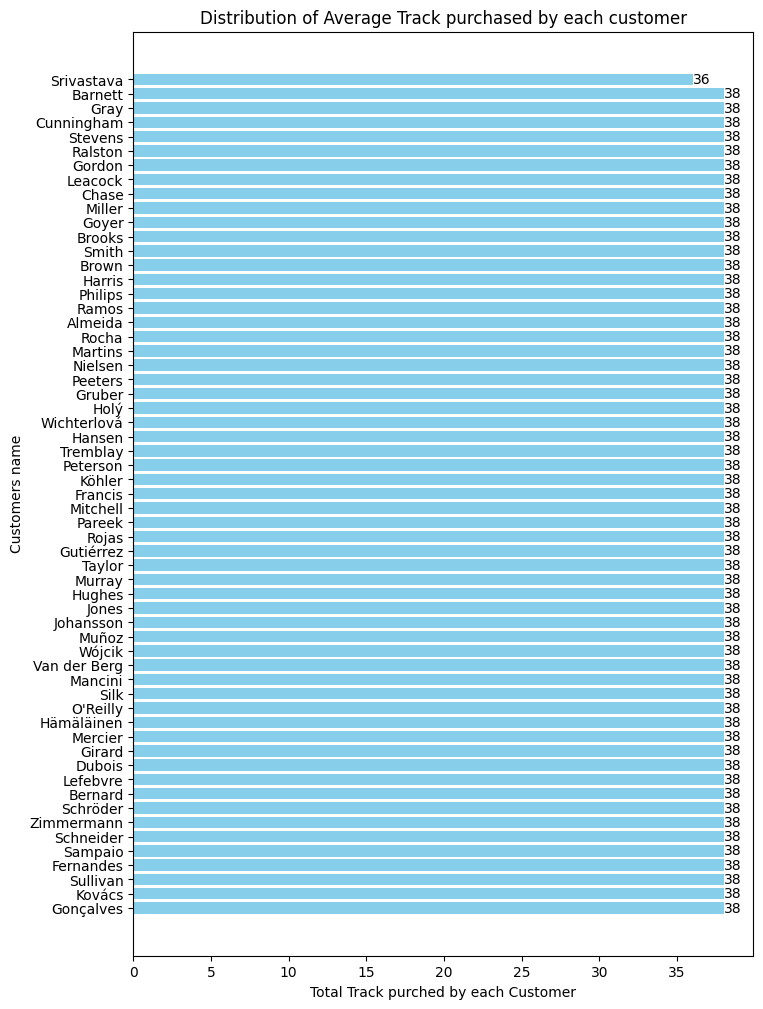

In [195]:
# plot 
plt.figure(figsize=(8,12))
barhchart = plt.barh(customer_track_purchase['LastName'], customer_track_purchase['count'], align='center', color='skyblue')

for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10)
    
plt.title('Distribution of Average Track purchased by each customer')
plt.ylabel('Customers name')
plt.xlabel('Total Track purched by each Customer')
plt.show()

In [193]:
# Confidence Interval
customer_track_purchase_mean = customer_track_purchase['count'].mean()
customer_track_purchase_std = customer_track_purchase['count'].std()
customer_track_purchase_count = customer_track_purchase['count'].count()

# 95% confidence interval
confidence_interval = stats.t.interval(0.95, df=customer_track_purchase_count-1, loc=customer_track_purchase_mean)
print(f"95% confidence interval for the average number of tracks purchased is ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

95% confidence interval for the average number of tracks purchased is (35.96, 39.97)
